## Imports

In [81]:
import pandas as pd
import sys

sys.path.insert(0,'../src')

from postprocess import *

## Interaction data processing

In [82]:
# For SATORI based interactions
df,suffix = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.08.txt',sep='\t'),'SATORI'
##df = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.04.txt',sep='\t')

# For FIS based interactions
#df,suffix = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-50.0.txt',sep='\t'),'FIS'
##df = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8_fixed/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [83]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [84]:
df.shape

(843, 12)

### Load the motif description file to annotate the interactions. 
Here we use CISBP (U toronto) motif description file. 

In [85]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [86]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


### Annotate the interacting motifs

In [87]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data=df_annotate, single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data=df_annotate, single_TF=True)

In [88]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
0,filter0<-->filter1,0,M1592_1.02,0.000295,M0905_1.02,0.020515,132.0,294.0,126.0,335.0,1.573308e-03,1.818528e-03,SOX3,HOXA6
1,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,24.0,153.0,274.0,9.404829e-05,1.265240e-04,SOX3,TLX2
2,filter0<-->filter71,70,M1592_1.02,0.000295,M4459_1.02,0.025375,336.0,90.0,202.0,230.0,1.949021e-07,4.402933e-07,SOX3,EGR1
3,filter0<-->filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,90.0,30.0,174.0,368.0,6.469072e-06,1.053251e-05,SOX3,HHEX
4,filter0<-->filter130,129,M1592_1.02,0.000295,M0891_1.02,0.040161,108.0,30.0,215.0,365.0,1.704953e-09,6.173908e-09,SOX3,TLX2


In [89]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [90]:
df = df[df['TF1']!=df['TF2']]

In [91]:
df.shape

(744, 15)

In [92]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [93]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [94]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter0<-->filter1,0,M1592_1.02,0.000295,M0905_1.02,0.020515,132.0,294.0,126.0,335.0,1.573308e-03,1.818528e-03,SOX3,HOXA6,SOX3$\longleftrightarrow$HOXA6
1,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,24.0,153.0,274.0,9.404829e-05,1.265240e-04,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2
2,filter0<-->filter71,70,M1592_1.02,0.000295,M4459_1.02,0.025375,336.0,90.0,202.0,230.0,1.949021e-07,4.402933e-07,SOX3,EGR1,SOX3$\longleftrightarrow$EGR1
3,filter0<-->filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,90.0,30.0,174.0,368.0,6.469072e-06,1.053251e-05,SOX3,HHEX,SOX3$\longleftrightarrow$HHEX
4,filter0<-->filter130,129,M1592_1.02,0.000295,M0891_1.02,0.040161,108.0,30.0,215.0,365.0,1.704953e-09,6.173908e-09,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2


In [95]:
df.shape

(744, 15)

## Most Frequent TF Family Interactions

In [96]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [97]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [98]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [99]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter0<-->filter1,0,M1592_1.02,0.000295,M0905_1.02,0.020515,132.0,294.0,126.0,335.0,1.573308e-03,1.818528e-03,SOX3,HOXA6,SOX3$\longleftrightarrow$HOXA6,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
1,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,24.0,153.0,274.0,9.404829e-05,1.265240e-04,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
2,filter0<-->filter71,70,M1592_1.02,0.000295,M4459_1.02,0.025375,336.0,90.0,202.0,230.0,1.949021e-07,4.402933e-07,SOX3,EGR1,SOX3$\longleftrightarrow$EGR1,Sox,C2H2 ZF,Sox$\longleftrightarrow$C2H2 ZF
3,filter0<-->filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,90.0,30.0,174.0,368.0,6.469072e-06,1.053251e-05,SOX3,HHEX,SOX3$\longleftrightarrow$HHEX,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
4,filter0<-->filter130,129,M1592_1.02,0.000295,M0891_1.02,0.040161,108.0,30.0,215.0,365.0,1.704953e-09,6.173908e-09,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain


In [100]:
df['filter_interaction'] = df['filter_interaction'].apply(lambda x: x.replace('<-->',r'$\longleftrightarrow$'))

In [101]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter0$\longleftrightarrow$filter1,0,M1592_1.02,0.000295,M0905_1.02,0.020515,132.0,294.0,126.0,335.0,1.573308e-03,1.818528e-03,SOX3,HOXA6,SOX3$\longleftrightarrow$HOXA6,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
1,filter0$\longleftrightarrow$filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,24.0,153.0,274.0,9.404829e-05,1.265240e-04,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
2,filter0$\longleftrightarrow$filter71,70,M1592_1.02,0.000295,M4459_1.02,0.025375,336.0,90.0,202.0,230.0,1.949021e-07,4.402933e-07,SOX3,EGR1,SOX3$\longleftrightarrow$EGR1,Sox,C2H2 ZF,Sox$\longleftrightarrow$C2H2 ZF
3,filter0$\longleftrightarrow$filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,90.0,30.0,174.0,368.0,6.469072e-06,1.053251e-05,SOX3,HHEX,SOX3$\longleftrightarrow$HHEX,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
4,filter0$\longleftrightarrow$filter130,129,M1592_1.02,0.000295,M0891_1.02,0.040161,108.0,30.0,215.0,365.0,1.704953e-09,6.173908e-09,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain


In [102]:
df.to_csv(f'output/Human-Promoter_interactions_{suffix}.csv')

### Distribution of individual TF or TF family interactions

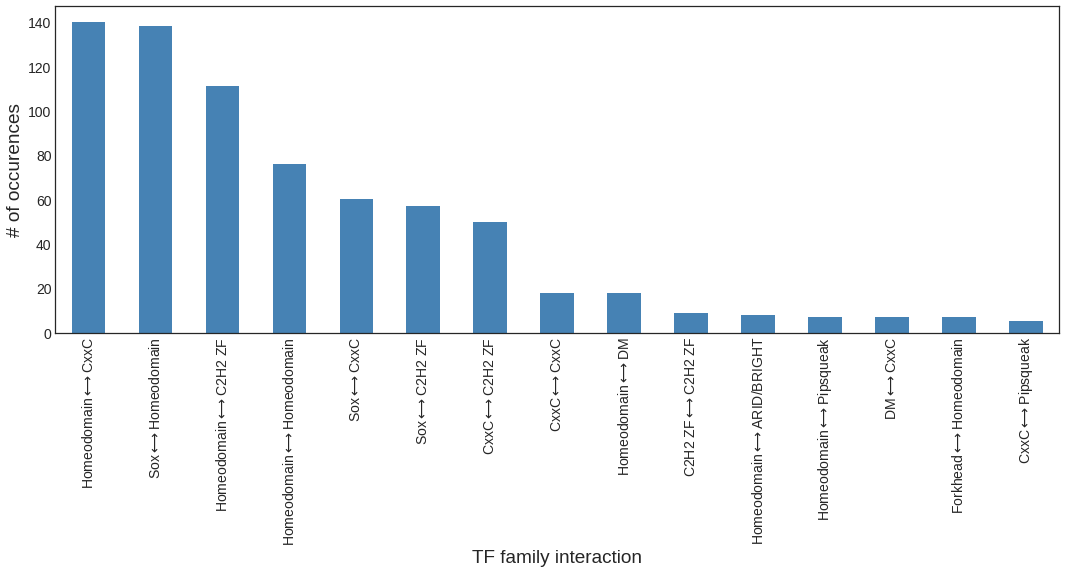

In [103]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15, store_pdf_path=f'output/Human_TF-Fams_supp_{suffix}.pdf')

### Plot interaction distance distribution

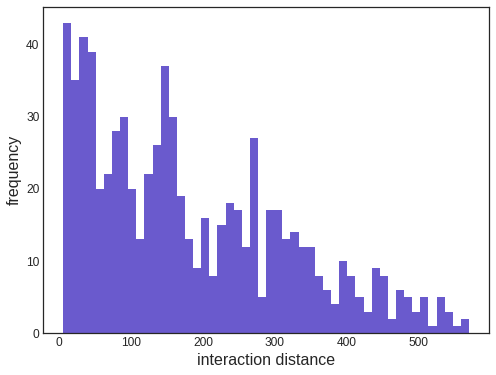

In [104]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [105]:
df['mean_distance'].mean(), df['mean_distance'].median()

(183.23387096774192, 150.0)

### Most frequent interactions and their respective interaction distances

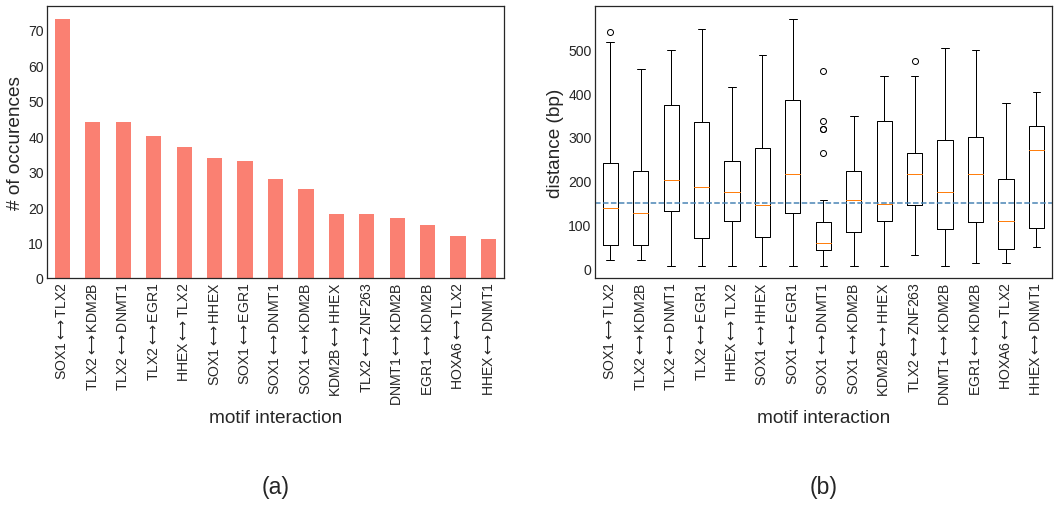

In [106]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_median_dist=True, store_pdf_path=f'output/human_promoter_main_distance_boxplot_{suffix}.pdf')

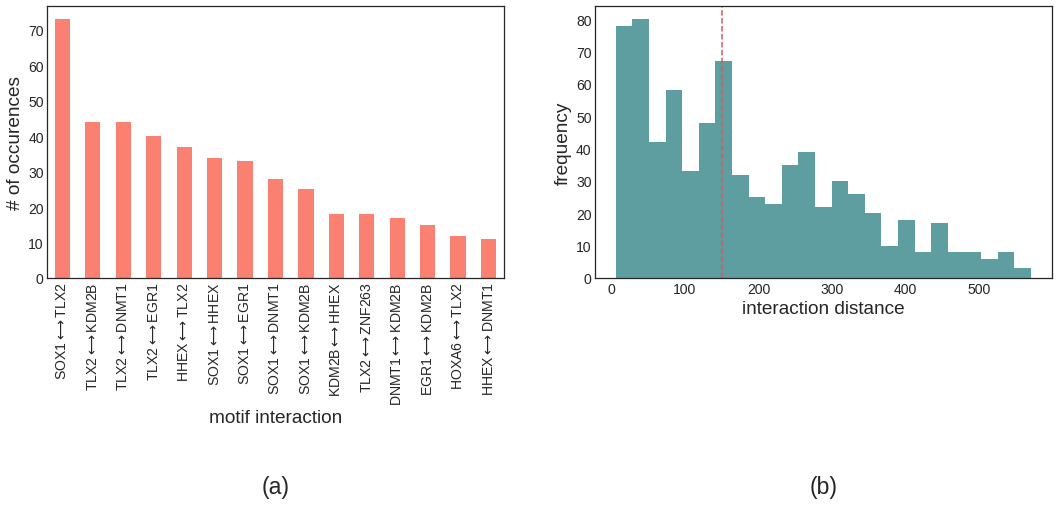

In [107]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_median_dist=True, store_pdf_path=f'output/human_promoter_main_distance_histogram_{suffix}.pdf')

### Annotate Interactions using TRRUSTv2 (and other sources)

#### Read TRRUSTv2 interactions

In [108]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [109]:
df['Interaction_in_TRUSTv2'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [110]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1]

In [111]:
df_resTRUSTv2x = df_resTRUSTv2[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

In [112]:
df_resTRUSTv2x

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
640,DNMT1$\longleftrightarrow$LCOR,CxxC,Pipsqueak,3.380879e-29
348,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC,1.297689e-22
359,EGR1$\longleftrightarrow$LCOR,C2H2 ZF,Pipsqueak,3.582952e-08
323,FOXK2$\longleftrightarrow$EGR1,C2H2 ZF,Forkhead,1.087635e-04


In [113]:
df_resTRUSTv2x.to_csv(f'output/Human_ATTN_TRRUSTv2_{suffix}.csv')

### Annotate Interactions using HIPPIE database

#### Read hippie interactions

In [114]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/Protein-interactions/hippie/interactions_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [115]:
for key,value in human_dict.items():
    human_dict[key] = np.array([[val, '', '0'] for val in value])

In [116]:
df['Interaction_in_HIPPIE'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [117]:
df_resHIPPIE = df[df['Interaction_in_HIPPIE']==1]

In [118]:
df_resHIPPIEx = df_resHIPPIE[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

In [119]:
df_resHIPPIEx

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
632,DNMT1$\longleftrightarrow$KDM2B,CxxC,CxxC,1.609986e-33
640,DNMT1$\longleftrightarrow$LCOR,CxxC,Pipsqueak,3.380879e-29
164,HHEX$\longleftrightarrow$TLX2,Homeodomain,Homeodomain,5.880988e-23
678,KDM2B$\longleftrightarrow$LCOR,CxxC,Pipsqueak,2.356636e-18
488,KDM2B$\longleftrightarrow$HHEX,Homeodomain,CxxC,5.237527e-18
405,FOXK2$\longleftrightarrow$DNMT1,Forkhead,CxxC,3.625482e-12
474,HHEX$\longleftrightarrow$ZNF32,Homeodomain,C2H2 ZF,1.241309e-07
6,SOX3$\longleftrightarrow$EGR1,Sox,C2H2 ZF,3.055347e-07
84,FOXK2$\longleftrightarrow$KDM2B,Forkhead,CxxC,2.070414e-05


In [120]:
df_resHIPPIEx.to_csv(f'output/Human_ATTN_HIPPIE_{suffix}.csv')